# Project 2 Final Deliverable

By Jonathan Montague and Caroline Rausch

#### Question:

# Initialization of Jupyter

In [189]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Body Heat Data

In [190]:
# heat loss from graph converted into K from C
evap_heat_loss = [155, 128, 107, 92, 74, 83, 80];

# environmental temperature at which data was collected
environment_temp = [278, 283, 288, 293, 298, 303, 308];

# creates a DataFrame table with the heat loss and the temperature at which that heat loss is observed
HeatTable = Series(data=evap_heat_loss, index=environment_temp)

278    155
283    128
288    107
293     92
298     74
303     83
308     80
dtype: int64

In [191]:
I = interpolate(HeatTable)

In [192]:
def get_body_heat(Itemp):
    return I(Itemp)

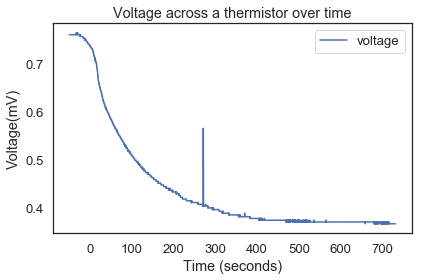

In [193]:
from pandas import read_csv
filename = 'ModSimTemp.csv'
tables = read_csv(filename, header=0, index_col=0)
len(tables)
tables.columns = ['voltage']
tables.index +=550
tables.plot()
decorate(xlabel='Time (seconds)',
             ylabel='Voltage(mV)',
        title='Voltage across a thermistor over time')

In [194]:
voltage = tables.voltage
resistance = 10000*voltage/(5-voltage)
temperature = 1 / ((1 / 298) + ((np.log(resistance / 1000)) / 3528))
tables.voltage = temperature
tables.columns = ['temp']

In [195]:
def plot_data(tables):
    tables.temp=tables.temp-273
    tables.plot()
    decorate(xlabel='Time (seconds)',
             ylabel='Internal Temperature (degrees C)')
    tables.temp=tables.temp+273

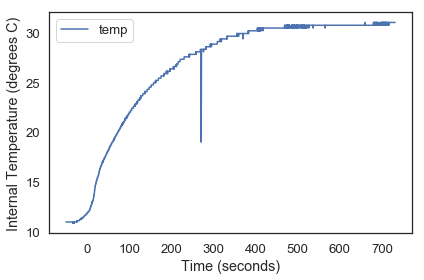

In [196]:
plot_data(tables)

# Modeling Sleeping Bag Temperature

In [197]:
Otemp = 285
Rvalue = 2.5
t0=0
t_end=800

800

In [198]:
init = State(Itemp = Otemp)

,values
Itemp,285


In [162]:
system = System(Otemp=Otemp , Rvalue=Rvalue, Air_mass=.01, Air_specific_heat=1005, t0=t0, t_end=t_end, dt=1)

,values
Otemp,285.00
Rvalue,2.50
Air_mass,0.01
Air_specific_heat,1005.00
t0,0.00
t_end,800.00
dt,1.00


In [163]:
def update_func(state, t, system):
   
    Itemp = state
    unpack(system)
    
    dHdt = (((get_body_heat(Itemp))/11 - (Itemp - Otemp)/Rvalue))*dt
    
    Itemp += dHdt/(Air_mass*Air_specific_heat)
    
    return Itemp

# Run Simulation

In [164]:
def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [165]:
def plot_results(results, tables):
    results.Itemp=results.Itemp-273
    #results.plot()
    
    tables.temp=tables.temp-273
   # tables.plot()
   
    ax = results.plot()
    tables.plot(ax=ax)
    
    tables.temp=tables.temp+273
    results.Itemp=results.Itemp+273
    
    decorate(xlabel='Time (seconds)',
             ylabel='Internal Temperature (degrees C)')

In [166]:
Rvalue = 2.5
t0=0
t_end=800

init = State(Itemp = Otemp)

system = System(Otemp=Otemp , Rvalue=Rvalue, Air_mass=.045, Air_specific_heat=1005, t0=t0, t_end=t_end, dt=1)

,values
Otemp,285.000
Rvalue,2.500
Air_mass,0.045
Air_specific_heat,1005.000
t0,0.000
t_end,800.000
dt,1.000


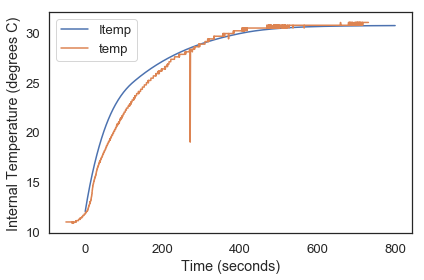

In [169]:
results = run_simulation(system,update_func)
plot_results(results, tables)

# Answering Question

In [ ]:
def make_system(Otemp):
    system = System(Otemp=Otemp , Rvalue=2.5, Air_mass=.01, Air_specific_heat=1005, t0=0, t_end=800, dt=1)

In [ ]:
otemp_array = linspace(263, 290, 10)

In [ ]:
for otemp in otemp_array:
    system = make_system(otemp)
    results = run_simulation(system, update_func)
    print(system.beta, calc_total_infected(results))

In [ ]:
def sweep_beta(beta_array, gamma):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for otemp in otemp_array:
        system = make_system(otemp)
        results = run_simulation(system, update_func)
        sweep[system.otemp] = calc_total_infected(results)
    return sweep

In [ ]:
otemp_sweep = sweep_otemp(otemp_array)